<a href="https://colab.research.google.com/github/farisazizy/FinalExam-GIGIH/blob/main/GG3DAUP0032_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [38]:
data = pd.read_csv('GG3 finals python dataset stackoverflow.csv', encoding='utf-8')

In [39]:
data.head()

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer
0,27733458,3769827.0,NaN,SQL script to get time to response in log table,<p>I have one scenario which I really have no ...,2015-01-01 18:31:22.693000 UTC,1,bq,27787398.0,1371484.0,2015-01-05 20:30:31.057000 UTC,1.0,1.0,False
1,27734669,2238969.0,NaN,Httparchive - BigQuery how to get median bytes...,<p>I am currently writing my bachelor theses a...,2015-01-01 21:04:30.070000 UTC,0,bq,27751284.0,3624307.0,2015-01-03 02:56:46.553000 UTC,1.0,2.0,False
2,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27786830.0,1371484.0,2015-01-05 19:52:02.710000 UTC,1.0,1.0,False
3,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27880982.0,428664.0,2015-01-10 20:38:15.840000 UTC,0.0,2.0,False
4,27748870,390973.0,NaN,BigQuery Cross Join Much Faster with Each,<p>I'm trying to look at user activity by date...,2015-01-02 21:38:00.870000 UTC,1,bq,27785857.0,3257867.0,2015-01-05 18:46:51.560000 UTC,6.0,0.0,True


# EDA

In [40]:
data.shape

(6795, 14)

In [41]:
data.duplicated().sum()

0

In [42]:
data.isnull().sum()

question_id                   0
question_owner_user_id       34
question_owner_location    4025
question_title                0
question_body                 0
question_created_date         0
question_score                0
question_tag                  0
answer_id                   402
answerer_user_id            410
answer_created_date         402
answer_score                402
answer_comment_count        402
is_accepted_answer            0
dtype: int64

In [43]:
data.dtypes

question_id                  int64
question_owner_user_id     float64
question_owner_location     object
question_title              object
question_body               object
question_created_date       object
question_score               int64
question_tag                object
answer_id                  float64
answerer_user_id           float64
answer_created_date         object
answer_score               float64
answer_comment_count       float64
is_accepted_answer            bool
dtype: object

In [44]:
# Changing the data type

data['question_id'] = data['question_id'].astype(str)
data['answer_id'] = data['answer_id'].astype(str)
data['answerer_user_id'] = data['answerer_user_id'].astype(str)
data['question_owner_user_id'] = data['question_owner_user_id'].astype(str)

data['question_score'] = data['question_score'].astype(float)

data['question_created_date'] = pd.to_datetime(data['question_created_date'])
data['answer_created_date'] = pd.to_datetime(data['answer_created_date'])

data['question_owner_location'] = data['question_owner_location'].astype('category')
data['question_tag'] = data['question_tag'].astype('category')

In [45]:
data.dtypes # Checking after changes

question_id                             object
question_owner_user_id                  object
question_owner_location               category
question_title                          object
question_body                           object
question_created_date      datetime64[ns, UTC]
question_score                         float64
question_tag                          category
answer_id                               object
answerer_user_id                        object
answer_created_date        datetime64[ns, UTC]
answer_score                           float64
answer_comment_count                   float64
is_accepted_answer                        bool
dtype: object

In [62]:
# Extract year and month

data['year'] = data['question_created_date'].dt.year
data['month'] = data['question_created_date'].dt.month

month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

data['month_str'] = data['month'].map(month_map)

# Use Case 1

Marketing team have an OKR where they need to create lots
of digital banner to attract people get into Stack Overflow.
They have an idea to create topic-based marketing. The
idea is to show how many relevant question there is in the
platform to people's needs. They want to show example
question asked in the platform and show how many
questions have been asked in the platform so far.


Your manager asks you to create the metrics calculation as
needed then show it into line chart where each tag (topic)
has a chart. A single line would represent year the question
is asked. The trend should be on monthly basis.
Metrics: unique questions per month per year

In [63]:
data1 = pd.DataFrame.copy(data)

In [64]:
data1.head(2)

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer,year,month,month_str
0,27733458,3769827.0,NaN,SQL script to get time to response in log table,<p>I have one scenario which I really have no ...,2015-01-01 18:31:22.693000+00:00,1.0,bq,27787398.0,1371484.0,2015-01-05 20:30:31.057000+00:00,1.0,1.0,False,2015,1,Jan
1,27734669,2238969.0,NaN,Httparchive - BigQuery how to get median bytes...,<p>I am currently writing my bachelor theses a...,2015-01-01 21:04:30.070000+00:00,0.0,bq,27751284.0,3624307.0,2015-01-03 02:56:46.553000+00:00,1.0,2.0,False,2015,1,Jan


In [66]:
# Group by year, month, and tag, then calculate count of unique questions

grouped = data.groupby(['year', 'month_str', 'question_tag'])['question_id'].nunique().reset_index()
grouped.rename(columns={'question_id': 'unique_question_count'}, inplace=True)
grouped

,year,month_str,question_tag,unique_question_count
0,2015,Apr,bq,75
1,2015,Apr,data-studio,3
2,2015,Apr,looker,0
3,2015,Aug,bq,69
4,2015,Aug,data-studio,0
...,...,...,...,...
103,2017,Oct,data-studio,11
104,2017,Oct,looker,1
105,2017,Sep,bq,134
106,2017,Sep,data-studio,14


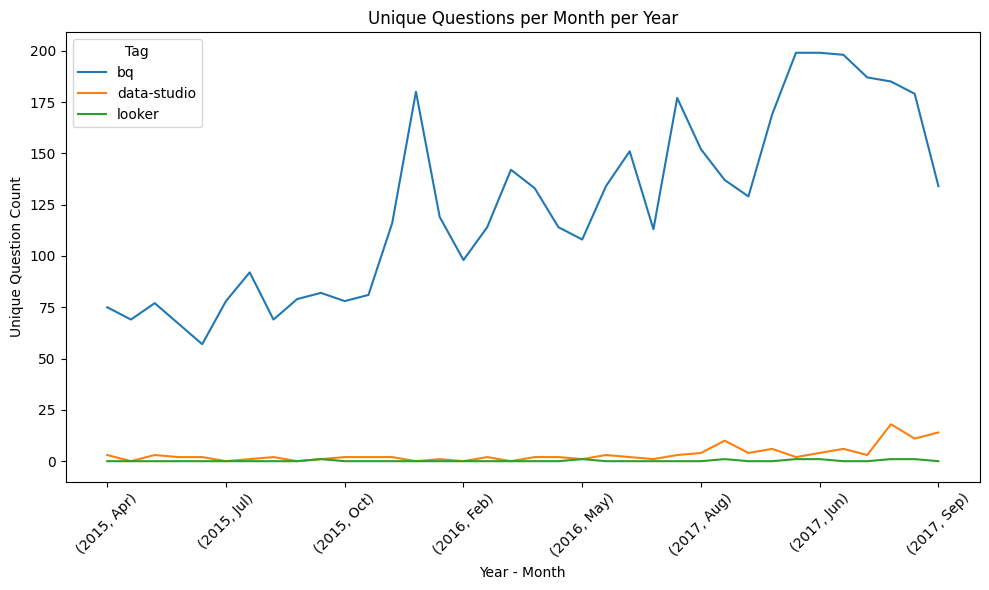

In [68]:
# Data Visualization
unique_questions_per_month_per_year = grouped.pivot_table(index=['year', 'month_str'], columns='question_tag', values='unique_question_count', fill_value=0)

# Create line charts
unique_questions_per_month_per_year.plot(kind='line', figsize=(10, 6))
plt.title('Unique Questions per Month per Year')
plt.xlabel('Year - Month')
plt.ylabel('Unique Question Count')
plt.legend(title='Tag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()